# Biweekly Report 1: Developing a thorough TensorFlow Encyclopedia/Reference and Performing Data Exploration for Further Insights

## By: Simon Julien (107019123)

In [157]:
import tensorflow as tf #got it installed
#print(tf.__version__)

## Following Tutorials to Develop TensorFlow Encyclopedia And Further Investigation

### Basic TensorFlow Operations
##### (No data analysis necessary in this section)

#### Initialization of Tensors

In [85]:
x=tf.constant(4,shape=(1,1),dtype=tf.float32) #specify shape and size
x=tf.constant([[1,2,3],[4,5,6]]) #manual matrix input
x=tf.ones((3,3)) #matrix of ones
x=tf.zeros((2,3)) #matrix of zeros
x=tf.eye(3) #identity matrix

x=tf.random.normal((3,3), mean=0, stddev=1) #random norm dist
x=tf.random.uniform((1,3),minval=0, maxval=1) #random normal

x=tf.range(9) #same as python range func
x=tf.range(start=1, limit=10, delta=2)

x=tf.cast(x,dtype=tf.float64) #cast to new types

print(x)

tf.Tensor([1. 3. 5. 7. 9.], shape=(5,), dtype=float64)


#### Mathematical Operations

In [86]:
x=tf.constant([1,2,3])
y=tf.constant([9,8,7])

z=tf.add(x,y) #add elementwise
z=x+y
z=tf.subtract(x,y) #subtract elementwise
z=x-y 

z=tf.divide(x,y) #divide elementwise
z=x/y
z=tf.multiply(x,y) #multiply elementwise
z=x*y

z=tf.tensordot(x,y, axes=1) #dot product
z=tf.reduce_sum(x*y, axis=0)

z=x**5 #exponential

x=tf.random.normal((2,3))
y=tf.random.normal((3,4))
z=tf.matmul(x,y) #matrix multiplication
z=x@y

print(z)

tf.Tensor(
[[-0.25870726  2.8296027   3.518337   -1.392397  ]
 [-0.03763912  0.371865    2.3537776  -0.53143656]], shape=(2, 4), dtype=float32)


#### Indexing

In [87]:
x=tf.constant([0,1,1,2,3,1,2,3])

print(x[:]) #all
print(x[1:]) #truncate
print(x[1:3]) #range
print(x[::2]) #skip 
print(x[::-1]) #reverse order

indices=tf.constant([0,3])
x_ind=tf.gather(x,indices) #grab particular indices
print(x_ind)

x=tf.constant([[1,2],[3,4],[5,6]])
print(x[0,:]) #multiple dimentions
print(x[0:2,:])

tf.Tensor([0 1 1 2 3 1 2 3], shape=(8,), dtype=int32)
tf.Tensor([1 1 2 3 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([0 1 3 2], shape=(4,), dtype=int32)
tf.Tensor([3 2 1 3 2 1 1 0], shape=(8,), dtype=int32)
tf.Tensor([0 2], shape=(2,), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


#### Reshaping

In [88]:
x=tf.range(9)
x=tf.reshape(x,(3,3)) #reshape

x=tf.transpose(x, perm=[1,0]) #transpose
print(x)

tf.Tensor(
[[0 3 6]
 [1 4 7]
 [2 5 8]], shape=(3, 3), dtype=int32)


### Building A Simple Neural Network
#### Initializing Data

In [158]:
from tensorflow import keras #higher level API
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist #example dataset

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(y_train.shape)

x_train=x_train.reshape(-1,28*28).astype("float32") / 255.0 #reshape, convert to cheaper float32, & normalize data
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0

(60000, 28, 28)
(60000,)


In the above cell, we are initializing data from the mnist dataset, which is a dataset containing black and white images of handwritten numbers that we then have to categorize.

#### Familiarizing with the Data

(60000, 784)


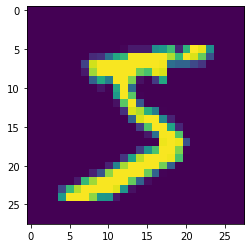

In [208]:
import numpy as np
import matplotlib.pyplot as plt

plotMat=np.zeros((784,1))
print(x_train.shape)
#print(x_train[0,:])

plotMat=np.reshape(x_train,(60000,28,28))
plt.imshow(plotMat[0,:,:])
plt.show()

After playing with the data I now understand that there are 60,000 data points where each data point is a 28 by 28 matrix that contains the hand-drawn number that we are trying to decipher.

Mean: 4.4539333333333335
stdDev: 2.889246360020012


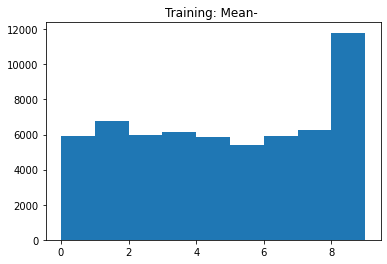

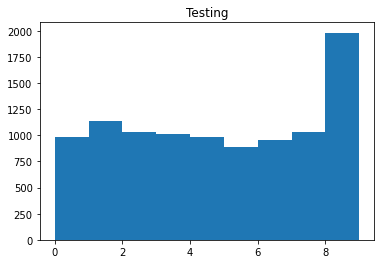

In [206]:
plt.hist(y_train,[0,1,2,3,4,5,6,7,8,9])
plt.title('Training: Mean- ')
print('Mean:', np.mean(y_train))
print('stdDev:', np.std(y_train))
plt.show()

plt.hist(y_test,[0,1,2,3,4,5,6,7,8,9])
plt.title('Testing')
plt.show()

The data is not uniformly distributed between all values 0-9. There are clearly more 9s in both the training and testing datasets. I to understand more about these distributions I will look into the distributions across multiple data.

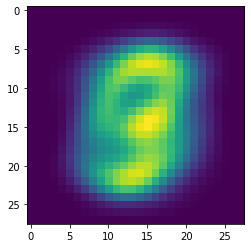

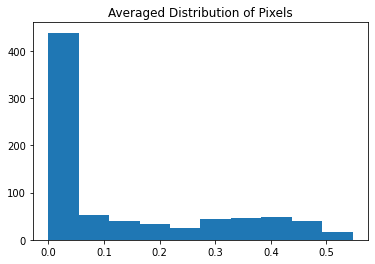

In [232]:
aggregation=np.zeros((28,28))
for i in range(len(plotMat[:,0,0])):
    aggregation=aggregation+plotMat[i,:,:]
    

avg=aggregation/len(plotMat[:,0,0])
plt.imshow(avg)
plt.show()

avg=np.reshape(avg,784)

plt.hist(avg)
plt.title('Averaged Distribution of Pixels')
plt.show()

As expected from the first figure, many of the pixels maintain a value of 0 nearly throughout all data points. Now I will perform a similar operator for each digit 0-9 individually.

[    7    10    12 ... 59978 59980 59996]
6


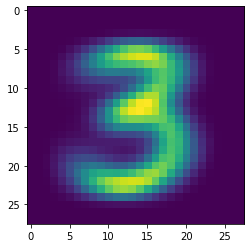

In [353]:
from tensorflow.keras.datasets import mnist #example dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28*28).astype("float32") / 255.0 #reshape, convert to cheaper float32, & normalize data
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0


digit=3
hit=np.where(y_train==digit)
hit=hit[0]
print(hit)
val=32
print(y_train[val])

agg=np.zeros((28,28))
avg=[]

for i in hit:
    agg=agg+plotMat[i,:,:]
avg=agg/len(hit)

#distributions of all of the same number (enter as "digit" above)
plt.imshow(avg)
plt.show()

#### Using Sequential API

The Sequential API is easier/quicker to use but far less flexible. It can be used when there is one input to one output of the network.

In [231]:
model=keras.Sequential( #Building the model with Google's keras
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512, activation='relu'), #densely connected layer with 512 nodes
        layers.Dense(256, activation='relu'),
        layers.Dense(10), #output layer
        
    ])

#You can also build model like this (better for debugging)
model=keras.Sequential()
model.add(keras.Input(shape=(28*28)))
model.add(layers.Dense(512, activation='relu')) #densely connected layer with 512 nodes
model.add(layers.Dense(256, activation='relu', name='my_layer'))
model.add(layers.Dense(10)) #output layer

print(model.summary()) #can only be called after definition of model

model=keras.Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers]) #model.get_layer('my_layer').output])
features=model.predict(x_train)
for feature in features:
    print(feature.shape) #print the shapes of each layer

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function
    optimizer=keras.optimizers.Adam(lr=0.001), #Using ADAM with learning rate, which in class we said is most common optimizer
    #optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9), #GRADIENT DECENT 
    #optimizer=keras.optimizers.Adagrad(lr=0.001), #ADAGRAD 
    #optimizer=keras.optimizers.RMSprop(lr=0.001), #RMSprop (Second best)
    metrics=["accuracy"], 
)

model.fit(x_train, y_train, batch_size=32, epochs =5, verbose=2) #train model
model.evaluate(x_test,y_test,batch_size=32,verbose=2) #test model


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 512)               401920    
_________________________________________________________________
my_layer (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_170 (Dense)            (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
(60000, 512)
(60000, 256)
(60000, 10)
Epoch 1/5
1875/1875 - 4s - loss: 1.1309 - dense_169_loss: 0.6471 - my_layer_loss: 0.2755 - dense_170_loss: 0.2082 - dense_169_accuracy: 0.8640 - my_layer_accuracy: 0.9307 - dense_170_accuracy: 0.9361
Epoch 2/5
1875/1875 - 4s - loss: 0.4808 - dense_169_loss: 0.3118 - my_layer_loss: 0.0819 - dense_170_loss: 0.0871 - dense_169_accuracy

[0.4013165235519409,
 0.2700919210910797,
 0.06449727714061737,
 0.06672719120979309,
 0.9253000020980835,
 0.9815000295639038,
 0.9799000024795532]

In the above cell, I implemented 4 optimizers to fit and test the sequential model. As suggested in class Adam is the best model to use according to the accuracy of our test results. Also featured are the various ways to build the model (the second one is better for debugging purposes) and how to display necessary components of the model for debugging and checking.

#### Using Functional API

Functional API is far more flexible than sequential API.

In [95]:
inputs=keras.Input(shape=(28*28)) #.Input instead of .Sequential
x=layers.Dense(512, activation='relu',name='first_layer')(inputs)
x=layers.Dense(256, activation='relu',name='second_layer')(x)
outputs=layers.Dense(10,activation='softmax')(x)
model=keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
    optimizer=keras.optimizers.Adam(lr=0.001), #Using Adam with learning rate, which in class we said is most common optimizer
    #optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9), #GRADIENT DECENT 
    #optimizer=keras.optimizers.Adagrad(lr=0.001), #ADAGRAD 
    #optimizer=keras.optimizers.RMSprop(lr=0.001), #RMSprop (Second best)
    metrics=["accuracy"], 
)


model.fit(x_train, y_train, batch_size=32, epochs =5, verbose=2)
model.evaluate(x_test,y_test,batch_size=32,verbose=2)



Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
dense_113 (Dense)            (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 - 3s - loss: 0.1892 - accuracy: 0.9425
Epoch 2/5
1875/1875 - 3s - loss: 0.0792 - accuracy: 0.9750
Epoch 3/5
1875/1875 - 3s - loss: 0.0533 - accuracy: 0.9835
Epoch 4/5
1875/1875 - 3s - loss: 0.0414 - accuracy: 0.9872
Epoch 5/5

[0.09544245898723602, 0.9753000140190125]

In the above cell I implemented the same test and validated process for my model with the function API. The performance here was relatively the same because the data I am using falls within the limited restrictions that allows sequential API to be used accurately.

### Building Convolutional Neural Networks

Here, I will be using cifar10 dataset which has images of 10 different classes of objects with 50,000 training and 10,000 test images. The images are 32x32 pixels with 3 (RBG) channels
#### Initialize data

In [354]:
from tensorflow.keras.datasets import cifar10 #New dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data() #load data
x_train=x_train.astype("float32") / 255.0 #convert to better computational type and normalize
x_test=x_test.astype("float32") / 255.0


#### Investigating Data

(50000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


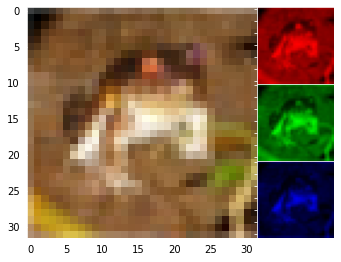

In [355]:
print(x_train.shape) #32,32,RBG x 50000

print(np.unique(y_train)) #so there are only 10 photos... lets see some

from mpl_toolkits.axes_grid1.axes_rgb import RGBAxes
fig = plt.figure()
ax = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8])


ax.imshow_rgb(x_train[0,:,:,0], x_train[0,:,:,1], x_train[0,:,:,2])
plt.show()


Choosing one pixel, I will plot the histogram distribution of the RGB values of the pixel across all data points below.

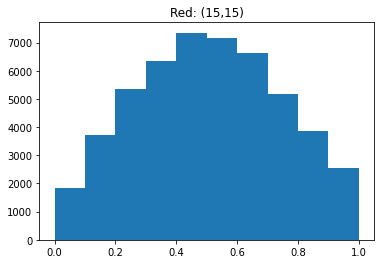

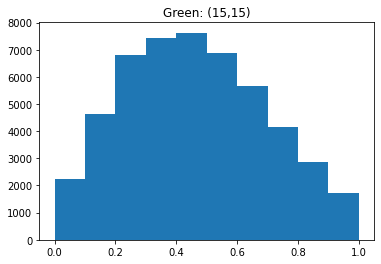

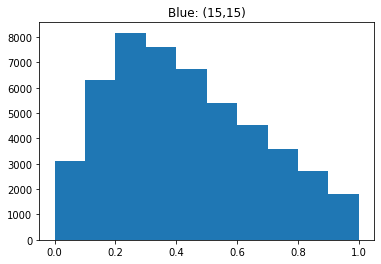

In [367]:
pixel=15 #choose pixel between 0 and 31
plt.hist(x_train[:,pixel,pixel,0])
plt.title('Red: ('+ str(pixel)+','+ str(pixel)+')')
plt.show()

plt.hist(x_train[:,pixel,pixel,1])
plt.title('Green: ('+ str(pixel)+','+ str(pixel)+')')
plt.show()

plt.hist(x_train[:,pixel,pixel,2])
plt.title('Blue: ('+ str(pixel)+','+ str(pixel)+')')
plt.show()

In the red histogram, the distribution appears normal, however green appears slightly skewed right and blue is very skewed right. This suggests in the middel of the photos there is a "medium" amount of red and not as much green or blue. Now lets investigate a corner.

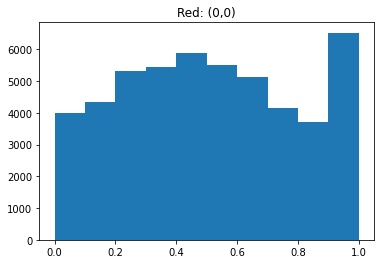

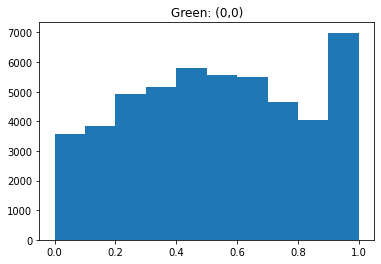

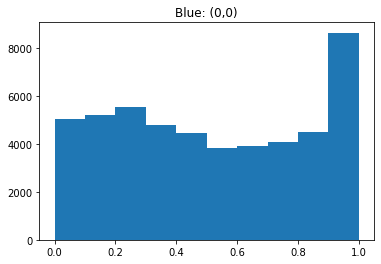

In [368]:
pixel=0 #choose pixel between 0 and 31
plt.hist(x_train[:,pixel,pixel,0])
plt.title('Red: ('+ str(pixel)+','+ str(pixel)+')')
plt.show()

plt.hist(x_train[:,pixel,pixel,1])
plt.title('Green: ('+ str(pixel)+','+ str(pixel)+')')
plt.show()

plt.hist(x_train[:,pixel,pixel,2])
plt.title('Blue: ('+ str(pixel)+','+ str(pixel)+')')
plt.show()

Here all distributions are more evenly distributed except for a tail for all of them around 1. RGB (255,255,255) is white, so this means it is most common to have a white or nearly white color in the corner. 

#### Convolutional NN with Sequential Model

In [102]:
model=keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(32, 3, padding='valid', activation='relu'), #Convolution(Ouput number of channels, kernel size)
        #if we say padding='same' then the tensors will maintain 32x32. If we say padding='valid', they will change by kernal size
        layers.MaxPooling2D(pool_size=(2,2)), #perform maxpooling (learned in class)
        layers.Conv2D(64,3,activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,activation='relu'),
        layers.Flatten(), #flatten for output
        layers.Dense(64,activation='relu'),
        layers.Dense(10), 
    ]
)

print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4), #Adam
    metrics=["accuracy"],
)

model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=2) #train
model.evaluate(x_test,y_test,batch_size=64,verbose=2) #test




Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 64)              

[0.9177760481834412, 0.6819999814033508]

The accuracy results of categorization through my sequential convolutional neural network and ADAM optimizer are somewhat low, however they could be improved with a larger training dataset. Alongside convolution, I have also demonstrated a usecase of padding (for the convolution) and Maxpooling after the convolution.

#### Convolutional NN with Functional Model

In [123]:
def my_model(): #defining model as python function for diversity
    inputs = keras.Input(shape=(32, 32, 3)) 
    x=layers.Conv2D(32, 3)(inputs)#convolution
    x=layers.BatchNormalization()(x)#Using BatchNorm
    x=keras.activations.relu(x)
    x=layers.MaxPooling2D()(x)
    x=layers.Conv2D(64, 3)(x) #layer 2
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.MaxPooling2D()(x)
    x=layers.Conv2D(128, 3)(x) #layer 3
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.Flatten()(x)
    x=layers.Dense(64, activation="relu")(x) #dense layer
    outputs=layers.Dense(10)(x)
    model=keras.Model(inputs=inputs, outputs=outputs)
    return model

model=my_model()

print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4), #Adam
    metrics=["accuracy"],
)

model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=2) #train
model.evaluate(x_test,y_test,batch_size=64,verbose=2) #test

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_28 (Batc (None, 13, 13, 64)        256

[0.9879726767539978, 0.6909999847412109]

Using the batch normalizations, the training is much faster and reaching higher levels of accuracy. However, the test data accuracy has not increase as much, which segways into the next section about the case that your data is overfit.

### Regularization with L2 and Dropout for Overfitting

In [109]:
from tensorflow.keras import regularizers

In this section I will be taking the code from building a convolutional NN with a functional model (above) and adding L2 regularizers and dropout. The changes in the code are signified and explained in comments.

In [124]:
def my_model(): #defining model as python function for diversity
    inputs = keras.Input(shape=(32, 32, 3)) 
    x=layers.Conv2D(
        32,3,padding='same',kernel_regularizer=regularizers.l2(0.01), #adding padding and L2 regularizer
    )(inputs) 
    x=layers.BatchNormalization()(x)#Using BatchNorm
    x=keras.activations.relu(x)
    x=layers.MaxPooling2D()(x)
    x=layers.Conv2D(
        64,3,padding='same',kernel_regularizer=regularizers.l2(0.01), #adding L2 regularizer
    )(x) 
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.MaxPooling2D()(x)
    x=layers.Conv2D(
        128,3,padding='same',kernel_regularizer=regularizers.l2(0.01), #adding padding and L2 regularizer
    )(x) 
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.Flatten()(x)
    x=layers.Dense(
        64,activation='relu',kernel_regularizer=regularizers.l2(0.01), #adding L2 regularizer
    )(x)
    x=layers.Dropout(0.5)(x) #DROPOUT 1/2 of the connections
    outputs=layers.Dense(10)(x)
    model=keras.Model(inputs=inputs, outputs=outputs)
    return model

model=my_model()

print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4), 
    metrics=["accuracy"],
)

model.fit(x_train,y_train,batch_size=64,epochs=150,verbose=2) #increase training duration to 150 to compensate for dropout
model.evaluate(x_test,y_test,batch_size=64,verbose=2) 

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
tf.nn.relu_30 (TFOpLambda)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_31 (Batc (None, 16, 16, 64)        256

Epoch 95/150
782/782 - 39s - loss: 0.9709 - accuracy: 0.7548
Epoch 96/150
782/782 - 38s - loss: 0.9620 - accuracy: 0.7611
Epoch 97/150
782/782 - 38s - loss: 0.9619 - accuracy: 0.7596
Epoch 98/150
782/782 - 38s - loss: 0.9617 - accuracy: 0.7600
Epoch 99/150
782/782 - 38s - loss: 0.9537 - accuracy: 0.7614
Epoch 100/150
782/782 - 39s - loss: 0.9627 - accuracy: 0.7603
Epoch 101/150
782/782 - 39s - loss: 0.9565 - accuracy: 0.7628
Epoch 102/150
782/782 - 39s - loss: 0.9590 - accuracy: 0.7623
Epoch 103/150
782/782 - 38s - loss: 0.9629 - accuracy: 0.7598
Epoch 104/150
782/782 - 39s - loss: 0.9541 - accuracy: 0.7651
Epoch 105/150
782/782 - 38s - loss: 0.9551 - accuracy: 0.7662
Epoch 106/150
782/782 - 38s - loss: 0.9564 - accuracy: 0.7632
Epoch 107/150
782/782 - 38s - loss: 0.9510 - accuracy: 0.7685
Epoch 108/150
782/782 - 38s - loss: 0.9604 - accuracy: 0.7635
Epoch 109/150
782/782 - 39s - loss: 0.9519 - accuracy: 0.7686
Epoch 110/150
782/782 - 38s - loss: 0.9489 - accuracy: 0.7690
Epoch 111/150

[1.2253975868225098, 0.7027999758720398]

Here we have improved the accuracy of running our model on the test dataset with two ways of compensating for overfitting (L2 Regularization and Dropout). Our model would improve more with more test data (more epochs).

### Model Subclassing

Thus far I have been investigating sequential and functional APIs for building these models. Subclassing requires one input for one output, and functional API adds more flexibility by being able to handel examples like this https://www.kaggle.com/dataset/eb9594e5b728b2eb74ff8d5e57a9b74634330bfa79d9195d6ebdc7745b9802c3?select=test.csv where multiple mnist numbers are in one tensor and the NN needs to classify multiple numbers per input. Subclassing, is an additional model constructor that is the most flexible out of the three. Instead of writing very similarly structured convolutional neural networks, we can make a class that is then easily applied when we want to perform the NN.

In [129]:
#Keep in mind package imports have already been called and ran in previous cells

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(-1,28,28,1).astype("float32") / 255.0 #add fourth argument to reshap for the number of channels
x_test=x_test.reshape(-1,28,28,1).astype("float32")/255.0

class CNNBlock(layers.Layer): #define class of method that we reuse very often
    def __init__(self, out_channels, kernel_size=3):
        super(CNNBlock, self).__init__()
        self.conv=layers.Conv2D(out_channels, kernel_size, padding='same') #define convolution step (used in previous models above)
        self.bn=layers.BatchNormalization() #Batch Norm as I did in previous models above
        
    def call(self, input_tensor, training=False):
        x=self.conv(input_tensor) #convolution
        x=self.bn(x,training=training) #batch
        x=tf.nn.relu(x) #reLu
        #notice that this is the same order and structure as I've been doing, just generalized into the class
        return x
    
#now putting it to use    
model= keras.Sequential(
    [
        CNNBlock(32), #call class
        CNNBlock(64), #Can easily repeat for new NN with similar model structure
        CNNBlock(128),
        layers.Flatten(),
        layers.Dense(10),
        
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=3, verbose=2)
model.evaluate(x_train, y_train, batch_size=64, verbose=2)

Epoch 1/3
938/938 - 158s - loss: 0.5961 - accuracy: 0.9460
Epoch 2/3
938/938 - 172s - loss: 0.0887 - accuracy: 0.9818
Epoch 3/3
938/938 - 184s - loss: 0.0349 - accuracy: 0.9892
938/938 - 54s - loss: 0.0199 - accuracy: 0.9936


[0.019878560677170753, 0.9935500025749207]

Next, we will use the above class of the repetative CNN building framework we have been using, and combining it with pooling and identity mapping. This will then simulate as similar method to what is known as ResNet, which was mentioned in class!

In [156]:
class ResBlock(layers.Layer): #Similar to ResNet
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.channels=channels
        self.cnn1=CNNBlock(channels[0], 3) #call previous class and input single channel as layer
        self.cnn2=CNNBlock(channels[1], 3)
        self.cnn3=CNNBlock(channels[2], 3)
        self.pooling=layers.MaxPooling2D()
        self.identity_mapping=layers.Conv2D(channels[1], 3, padding="same") #keep same size after map

    def call(self, input_tensor, training=False):
        x=self.cnn1(input_tensor, training=training)
        x=self.cnn2(x, training=training)
        x=self.cnn3(x + self.identity_mapping(input_tensor), training=training,) #using identity mapping to make tensor correct size for addition
        x=self.pooling(x)
        return x


class ResNet_Like(keras.Model):
    def __init__(self, num_classes=10):
        super(ResNet_Like, self).__init__()
        self.block1=ResBlock([32, 32, 64])
        self.block2=ResBlock([128, 128, 256])
        self.block3=ResBlock([128, 256, 512])
        self.pool=layers.GlobalAveragePooling2D() #Alternative call to Flatten() but is average pooling (from class)
        self.classifier=layers.Dense(num_classes) #self classification stage

    def call(self, input_tensor, training=False):
        x=self.block1(input_tensor, training=training)
        x=self.block2(x, training=training)
        x=self.block3(x, training=training)
        x=self.pool(x, training=training)
        x=self.classifier(x)
        return x

    def model(self): #avoid multiple shapes
        x=keras.Input(shape=(28, 28, 1))
        return keras.Model(inputs=[x], outputs=self.call(x))


model=ResNet_Like().model()
base_input=model.layers[0].input
base_output=model.layers[2].output
output=layers.Dense(10)(layers.Flatten()(base_output))
model=keras.Model(base_input, output)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=2)
#print(model.model().summary())
model.evaluate(x_test, y_test, batch_size=64, verbose=2)
        

938/938 - 243s - loss: 0.1096 - accuracy: 0.9657
157/157 - 14s - loss: 0.0629 - accuracy: 0.9805


[0.06286587566137314, 0.9804999828338623]

Above, we have just demonstrated the efficiency and flexibility of subclassing by embedding so many models. Relative to the previous models I have built, this model is far larger, yet still simple to construct and code.